In [1]:
import dynpssimpy.dynamic as dps
import dynpssimpy.modal_analysis as dps_mdl
import dynpssimpy.plotting as dps_plt
import numpy as np
import matplotlib.pyplot as plt
import json
from sparculing.helper_functions import *
from sparculing.gen_sens import *

In [2]:
# with open('k2a.json') as f:
#     data= f.read()

# model = json.loads(data)  
sys = dps.PowerSystemModel('k2a.json')

In [3]:
# pl0 = get_load_power_vector(model)
pl0 = sys.loads['Load'].par['P'].copy()

# pg0=get_gen_power_vector(model)
pg0 = sys.gen['GEN'].par['P'].copy()

In [4]:
np.sum(pg0)

2819

Before load change:	P_load=[ 967 1767]	P_gen=[700.         700.         719.09238061 700.        ]
After load change:	P_load=[ 867 1867]	P_gen=[700.        700.        734.7668847 700.       ]


(-20.0, 1.0)

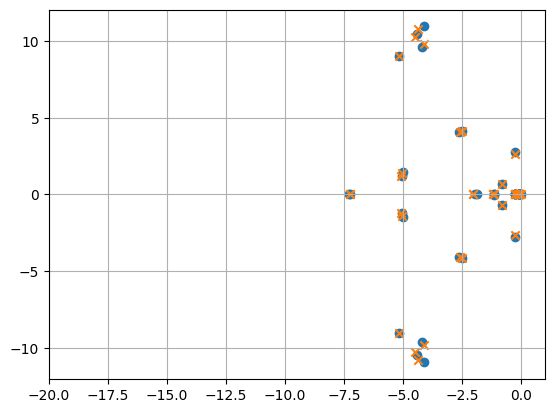

In [5]:
sys=dps.PowerSystemModel('k2a.json')
sys.init_dyn_sim()
lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
lin_sys.eigenvalue_decomposition()
eigs_0 = lin_sys.eigs.copy()
print(f"Before load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")


change_all_load_powers(sys, pl0+[-100,100])

sys.power_flow()
sys.init_dyn_sim()
lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
lin_sys.eigenvalue_decomposition()
eigs_1 = lin_sys.eigs.copy()


print(f"After load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")
# print(sys.s_0)

fig, ax = plt.subplots(1)
plt.grid()
ax.scatter(eigs_0.real, eigs_0.imag)
ax.scatter(eigs_1.real, eigs_1.imag, marker='x')
ax.set_xlim(-20, 1)

# print(eigs_0 - eigs_1)


In [6]:
change_all_load_powers(sys, pl0)

Before load change:	P_load=[ 967 1767]	P_gen=[700.         700.         719.09238061 700.        ]
After load change:	P_load=[ 967 1767]	P_gen=[800.         700.         738.50497797 600.        ]


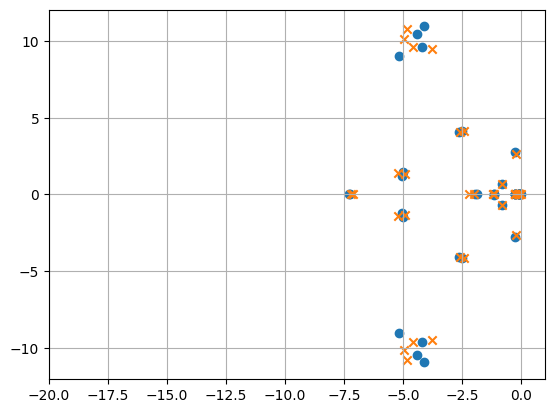

In [7]:
sys=dps.PowerSystemModel('k2a.json')
sys.init_dyn_sim()
print(f"Before load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")

# sys.power_flow()
# sys.init_dyn_sim()
# lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
# lin_sys.eigenvalue_decomposition()
lin_sys = get_lin_sys(sys)
eigs_0 = lin_sys.eigs.copy()



change_all_gen_powers(sys, pg0+[100,0,0,-100])
sys.power_flow()
sys.init_dyn_sim()
print(f"After load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")

# sys.power_flow()
# sys.init_dyn_sim()
# lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
# lin_sys.eigenvalue_decomposition()
lin_sys = get_lin_sys(sys)
eigs_1 = lin_sys.eigs.copy()

fig, ax = plt.subplots(1)
plt.grid()
ax.scatter(eigs_0.real, eigs_0.imag)
ax.scatter(eigs_1.real, eigs_1.imag, marker='x')
ax.set_xlim(-20, 1)

change_all_gen_powers(sys, pg0)

In [8]:
sys=dps.PowerSystemModel('k2a.json')
sys.init_dyn_sim()
ps_lin = dps_mdl.PowerSystemModelLinearization(sys)
ps_lin.linearize()
ps_lin.eigenvalue_decomposition()

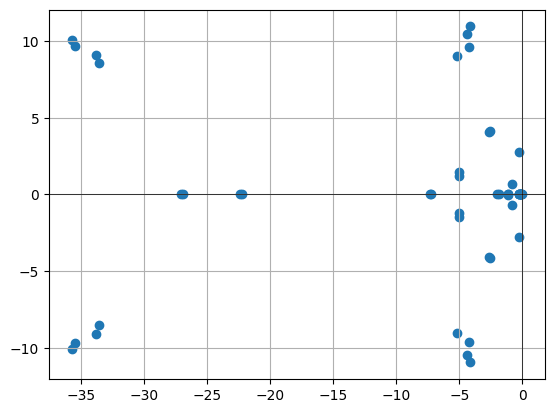

In [9]:
dps_plt.plot_eigs(ps_lin.eigs)

In [10]:
remove_inaccurate_zero(ps_lin)

In [11]:
np.argmin(ps_lin.damping)

30

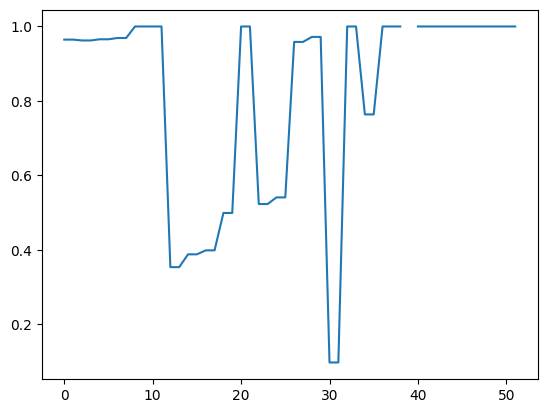

In [12]:
plt.plot(ps_lin.damping)

In [13]:
np.min(ps_lin.damping)

0.09737870900787997

In [14]:
senser = GenSensDispatchUnconstrained(sys)

In [15]:
# np.shape(senser.gen_sens)

In [16]:
dP = 2e-2
sens_single_gen, eigs_0, eigs_1 =senser.get_gen_sens_single_gen(0, dP=dP, return_eigs=True)

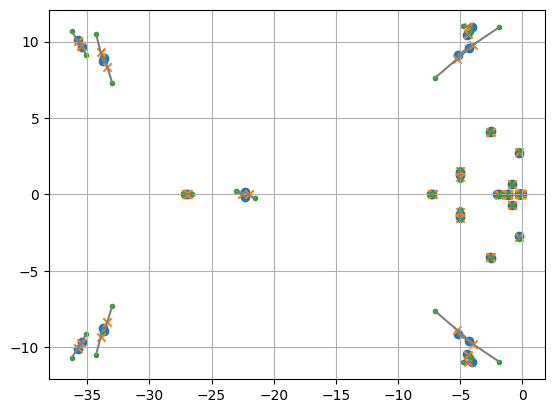

In [17]:

#genser = eigs_0 - eigs_1
eigs_pred = eigs_0 - sens_single_gen*dP*.5e4
linear_locus = np.vstack([eigs_0, eigs_pred]).T
eig_idx = slice(None)  # 10,17)  # 7, 8)
# print(np.argmin(np.abs(eigs_0 + 5 - 8j)))
# print(eigs_0[16])

plt.scatter(eigs_0[eig_idx].real, eigs_0[eig_idx].imag)
plt.scatter(eigs_1[eig_idx].real, eigs_1[eig_idx].imag, marker='x')
plt.scatter(eigs_pred[eig_idx].real, eigs_pred[eig_idx].imag, marker='.')
for line in linear_locus[eig_idx]:
    plt.plot(line.real, line.imag, color='gray')
# plt.xlim([-10, 1])
# plt.ylim([-10, 10])
plt.grid()

In [18]:
print(np.angle(eigs_0 - eigs_1)[0])
print(np.angle(sens_single_gen[0]))

-0.9279670064741911
-0.9279670064741911


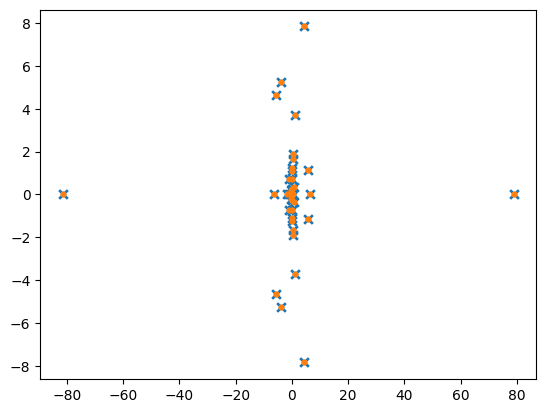

In [20]:
genser = senser.get_gen_sens(dP=1e-6)
genser2=senser.get_gen_sens(dP=1e-5)*10
#genser3=senser.get_gen_sens(dP=1e-4)
#genser4=senser.get_gen_sens(dP=1e-3)
#genser5=senser.get_gen_sens(dP=1e-2)

# np.max(abs(genser2-genser3))
plt.scatter(genser.real, genser.imag, marker='x')
plt.scatter(genser2.real, genser2.imag, marker='.')
# plt.scatter(genser3.real, genser3.imag, marker='.')
# plt.scatter(genser4.real, genser4.imag, marker='.')
# plt.scatter(genser4.real, genser5.imag, marker='.')

In [72]:
self = senser 
gen_i = 1
dP = 1e-6

sens = np.zeros(len(self.eigs_0), dtype=complex)
rating = self.ratings[gen_i]

change = rating * dP

powers = self._change_power_with_distributed_slack(change, gen_i)
print(powers)
change_all_gen_powers(self.ps, powers)
print(self.ps.gen['GEN'].par['P'])
    
ps_lin = get_lin_sys(self.ps)
remove_inaccurate_zero(ps_lin)
sens = ps_lin.eigs.copy()
eigs_0 = ps_lin.eigs.copy()
# print(eigs_0[0])

powers = self._change_power_with_distributed_slack(-2 * change, gen_i)
print(powers)
change_all_gen_powers(self.ps, powers)

ps_lin = get_lin_sys(self.ps)
remove_inaccurate_zero(ps_lin)
    
sens -= ps_lin.eigs
print(sens[0])
sens = sens / (self.ratings[gen_i] * 2 * dP)
eigs_1 = ps_lin.eigs.copy()
print(f'abs(eigs)={abs(eigs_1[0] - eigs_0[0])}')
    
powers = self._change_power_with_distributed_slack(change, gen_i)
change_all_gen_powers(self.ps, powers)
# print(sens[0])

[700.0003 700.0009 719.0003 700.0003]
[699.9994 699.9982 718.9994 699.9994]
(0.0002487688141883382-0.0013315758509264697j)
abs(eigs)=0.0013546143988911472


In [21]:

slack_ratings = self.ratings[np.arange(len(self.ratings)) != gen_i]
slack = slack_ratings / np.sum(slack_ratings) * change

powers = np.array(self.p, dtype=float)
powers[np.arange(len(powers)) != gen_i] = (
    powers[np.arange(len(powers)) != gen_i] + slack
)
powers[gen_i] = powers[gen_i] + change

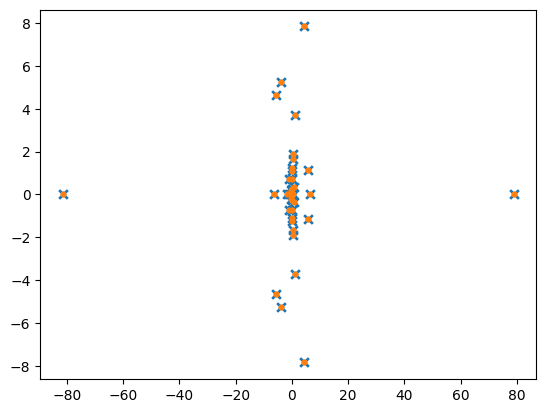

In [ ]:
np.sum(genser3-genser2)

(2.467298189589723+0j)

In [ ]:
np.sum(genser5-genser2)

(2.705795022398532+0j)

In [ ]:
from copy import deepcopy

In [ ]:
copy(senser.model)

The system cannot find the file specified.


In [ ]:
jac = senser._make_jacobian(senser.zeta+0.01)

In [ ]:
jac

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -6.23694309e-04,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.85799189e-04,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.87557343e-04,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -6.98742141e-04,  1.00000000e+00],
       [-6.23694309e-04, -5.85799189e-04, -3.87557343e-04,
        -6.98742141e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
np.linalg.solve(-jac, f)

UFuncTypeError: Cannot cast ufunc 'solve' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
test=senser.get_gen_sens(dP=0.05)

In [ ]:
np.linalg.matrix_rank(jac)

In [ ]:
jac.shape

In [ ]:
jac[0,:]

In [ ]:
jac[1,:]

In [ ]:
senser.gen_sens[senser.min_mode, :]

In [ ]:
np.linalg.det(jac)

In [ ]:
senser.ps_lin_0.eigs[senser.min_mode]

In [ ]:
senser.ps_lin_0.damping[senser.min_mode]

In [ ]:
np.real(test[30,:])

In [ ]:
np.imag(test[30,:])

In [ ]:
(0.1/np.sqrt(1-0.01)*np.imag(test[30,:]))[1]-(0.1/np.sqrt(1-0.01)*np.imag(test[30,:]))[0]